In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache direc

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rc('font', family='NanumBarunGothic')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = '//content/drive/MyDrive/DB프로젝트/data_csv'

columns_to_read = ['계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = sorted([f for f in os.listdir(folder_path) if f.startswith('result_EnergyConsumption') and f.endswith('.csv')])

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

# 각 파일의 첫 번째 행의 데이터를 읽어와서 빈 데이터프레임에 추가
for file in file_list:
    file_path = os.path.join(folder_path, file)
    # file_data = pd.read_csv(file_path)
    # file_data.set_index(file_data.columns[0], inplace=True)
    # file_data = file_data.T
    # file_data.to_csv(file_path)
    data = pd.read_csv(file_path, usecols=columns_to_read, nrows=1)  # 첫 번째 행만 읽기
    first_row_data = pd.concat([first_row_data, data])

# 인덱스를 '2012'부터 '2022'까지 변경
first_row_data.index = [str(year) for year in range(2012, 2023)]

# first_row_data.columns = ['total', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju']

# 데이터프레임 출력
print(first_row_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              계       서울       부산       대구        인천      광주       대전  \
2012  151037242  1874442  3409887   757691  18072346  414002   588745   
2013  153577930  1550804  2993116   795881  17921528  387182   578692   
2014  156068140  2618653  2296291  1272745  16809442  446765   964900   
2015  161781939  2662272  2676683  1331104  16872197  434046   986728   
2016  163279779  2569371  2410981  1261012  15515030  436038  1005900   
2017  169560784        X  2855285  1253583  15735772  424060   978717   
2018  169560784        X  2855285  1253583  15735772  424060   978717   
2019  154943952        X  2435787  1099122  14231935  386334   905867   
2020  162357441        X        X  1211986  14654026  410061   930373   
2021  159111027        X        X  1165227  13359509  409018   915067   
2022     630321        X   409018   915067   1165227       X        

# **결측치 처리**

In [5]:
first_row_data.replace("X", float('nan'), inplace=True)

In [6]:
first_row_data = first_row_data.fillna(0).astype(int)

In [7]:
first_row_data

,계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2012,151037242,1874442,3409887,757691,18072346,414002,588745,12881205,259252,11441370,4244324,2634862,39662689,3224579,23214821,11453904,16215053,688070
2013,153577930,1550804,2993116,795881,17921528,387182,578692,11800069,654615,11629215,4720757,2637086,41881226,3354212,24472807,12367713,15257463,575564
2014,156068140,2618653,2296291,1272745,16809442,446765,964900,11633572,667899,15321567,4327134,2859920,40335652,3204958,25049474,12316209,15352034,590925
2015,161781939,2662272,2676683,1331104,16872197,434046,986728,12524581,669640,16579835,4899104,3058978,40701915,4083519,25705296,12586222,15410431,599390
2016,163279779,2569371,2410981,1261012,15515030,436038,1005900,12085644,707323,17398695,7590760,3030615,42335153,3708974,26274480,12156146,14237617,556041
2017,169560784,0,2855285,1253583,15735772,424060,978717,13654384,0,19710579,9699068,3024003,41983514,0,26490564,12538749,13572539,426181
2018,169560784,0,2855285,1253583,15735772,424060,978717,13654384,0,19710579,9699068,3024003,41983514,0,26490564,12538749,13572539,426181
2019,154943952,0,2435787,1099122,14231935,386334,905867,12871197,0,19411964,7667671,3276264,39285683,3320002,24500001,12102220,8971442,413364
2020,162357441,0,0,1211986,14654026,410061,930373,0,0,21441502,8057999,3333840,38891705,0,26149345,12123634,10960519,461836
2021,159111027,0,0,1165227,13359509,409018,915067,0,0,22641088,9108374,3359185,38337059,0,23626333,10673381,12278005,630321


# **지역별 에너지 소비량**

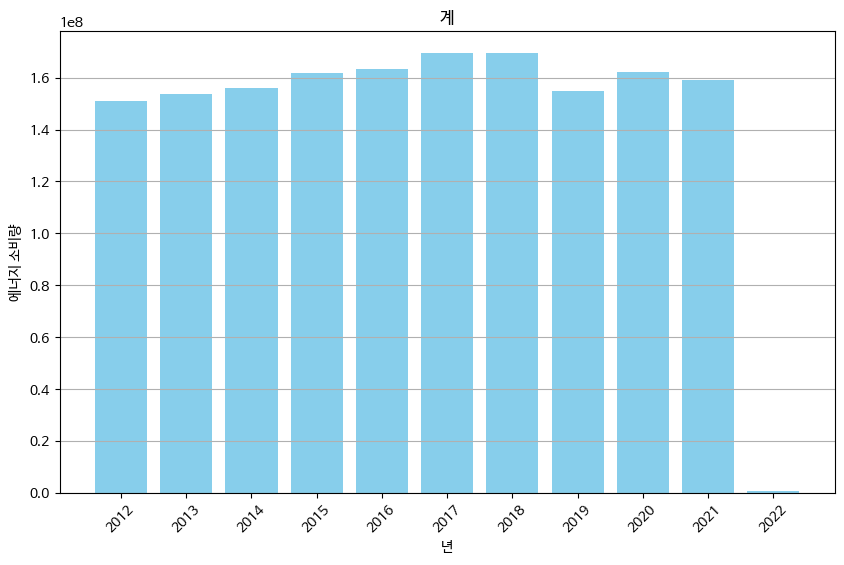

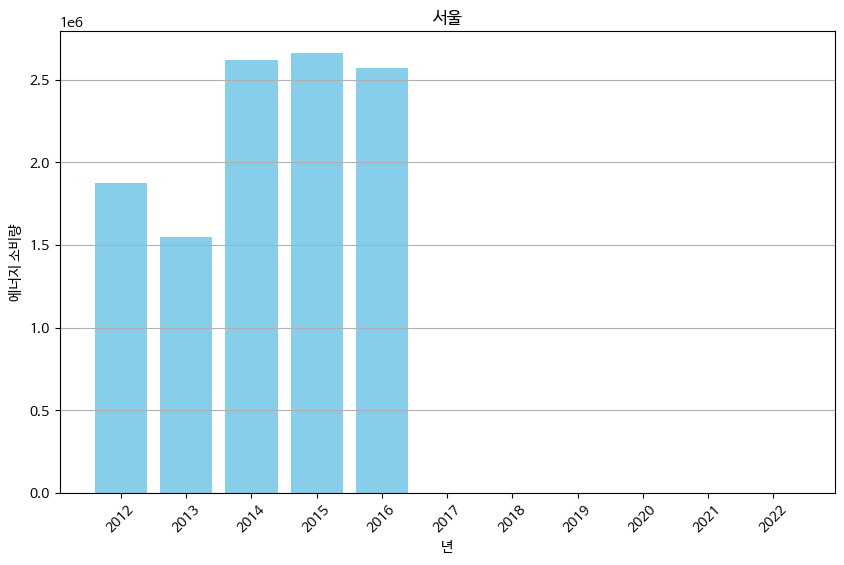

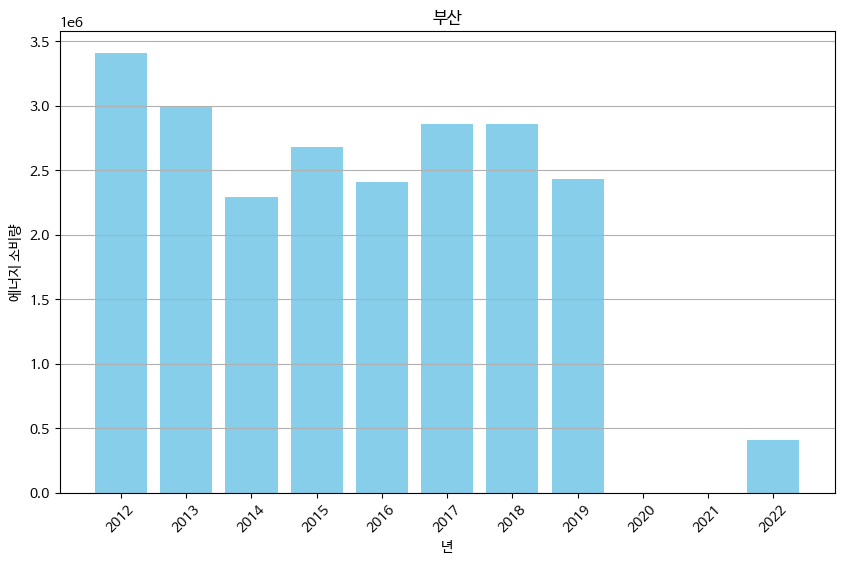

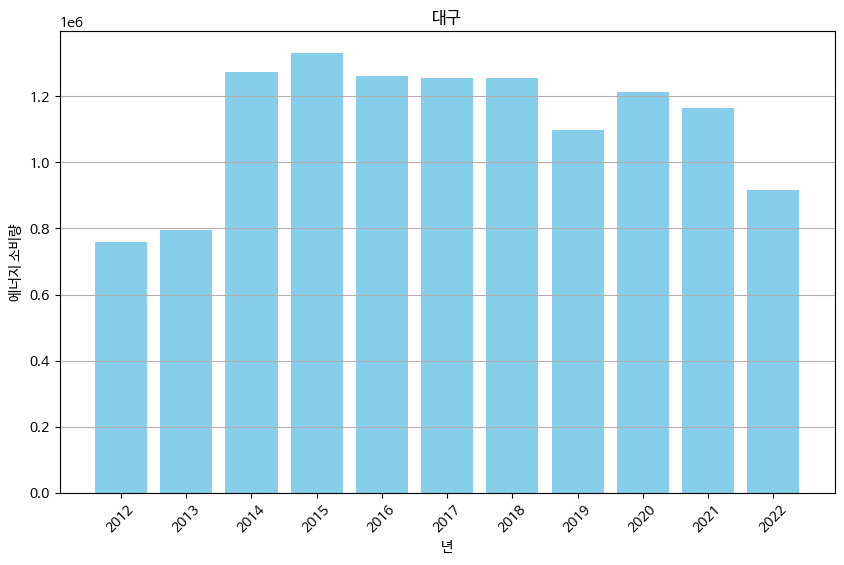

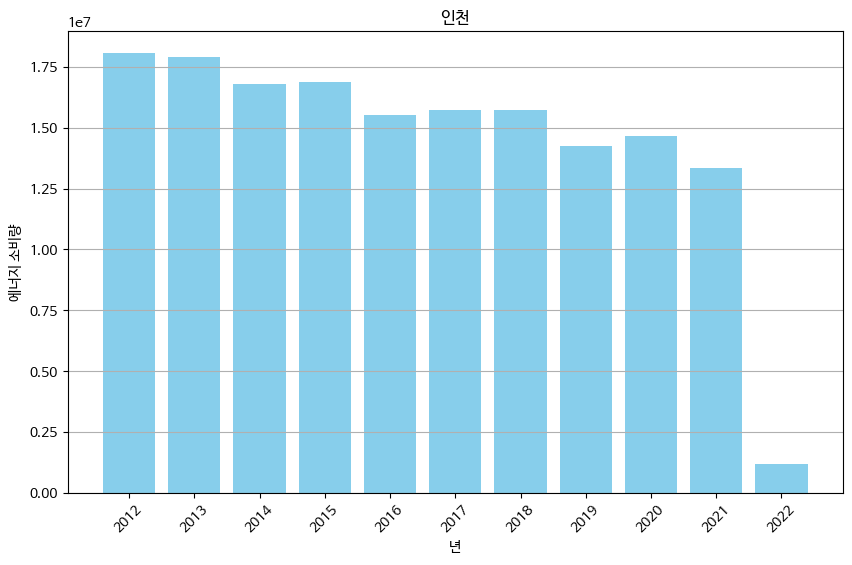

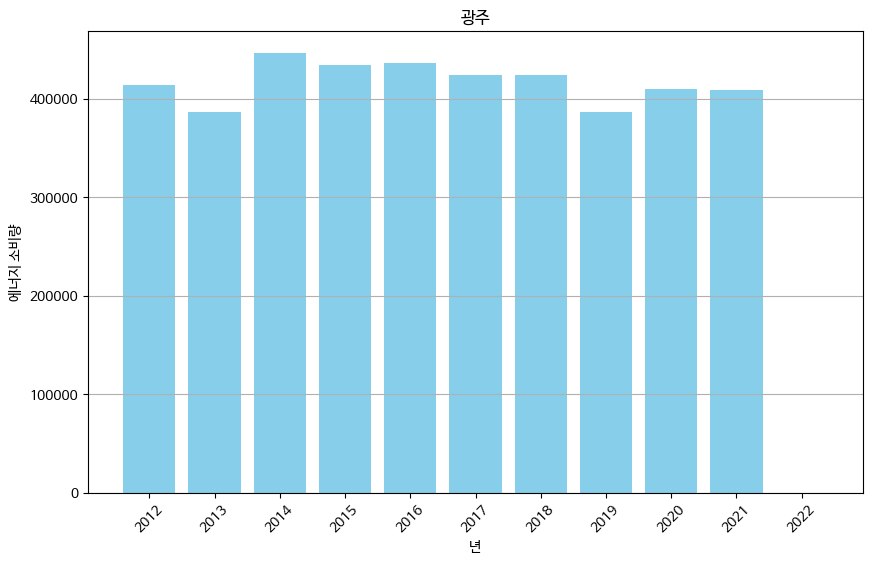

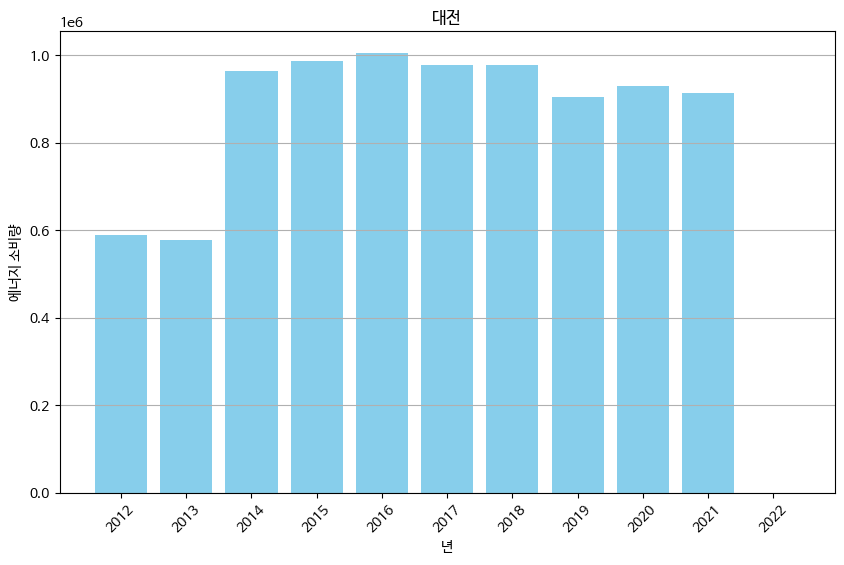

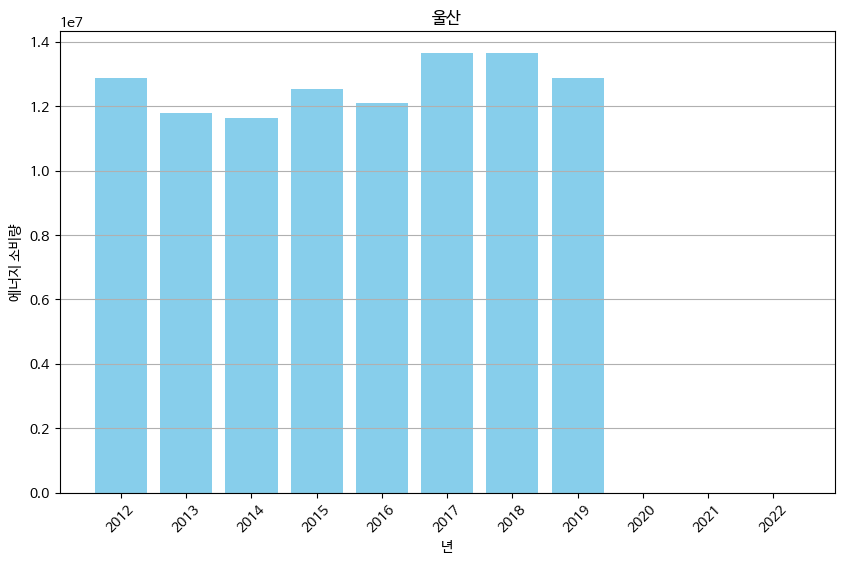

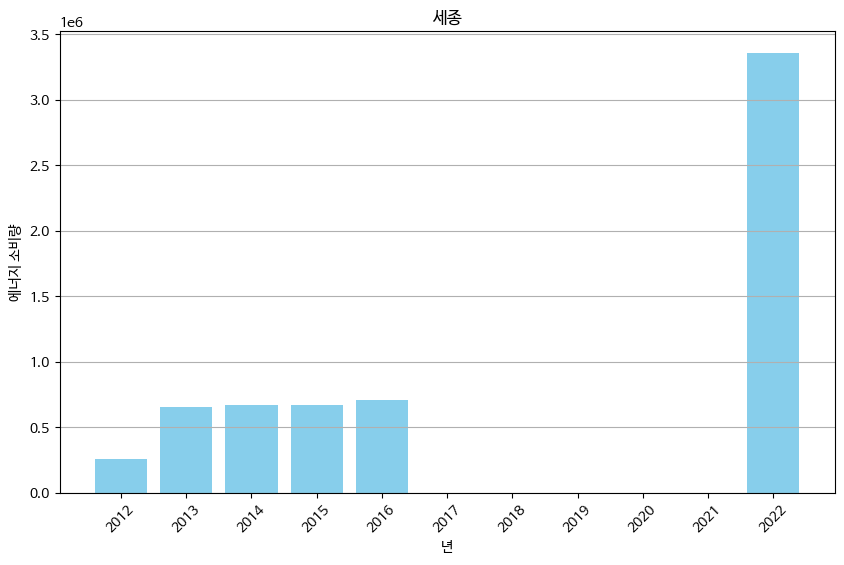

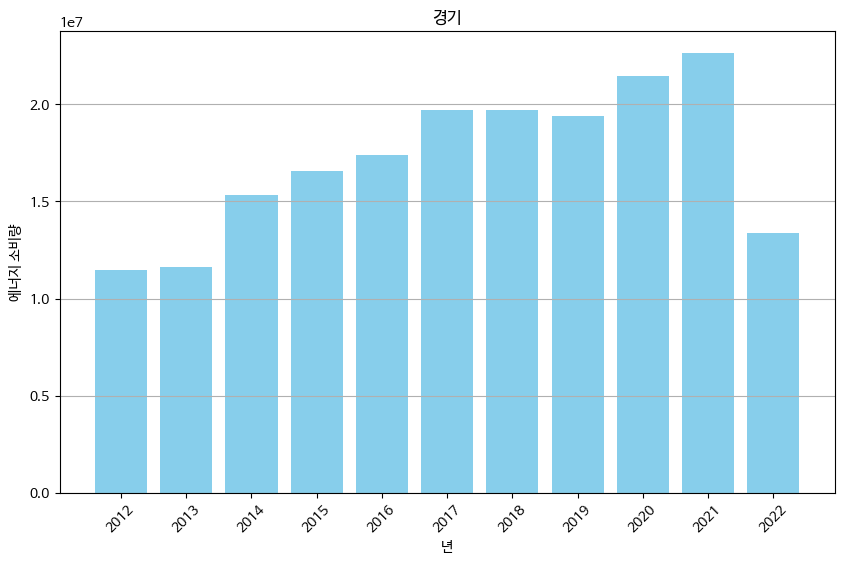

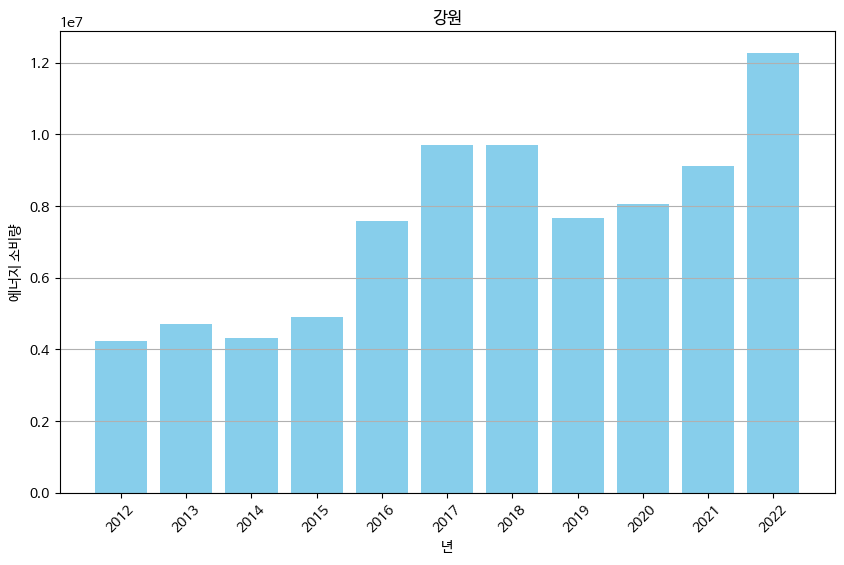

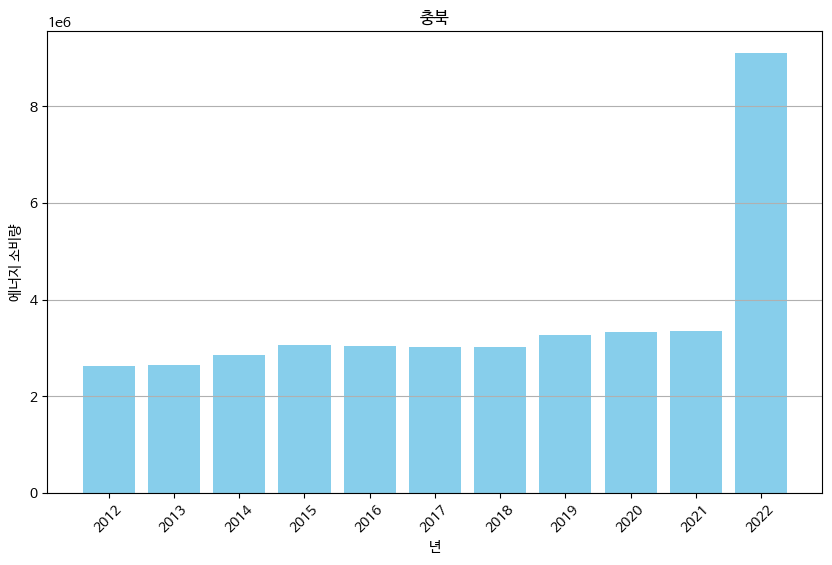

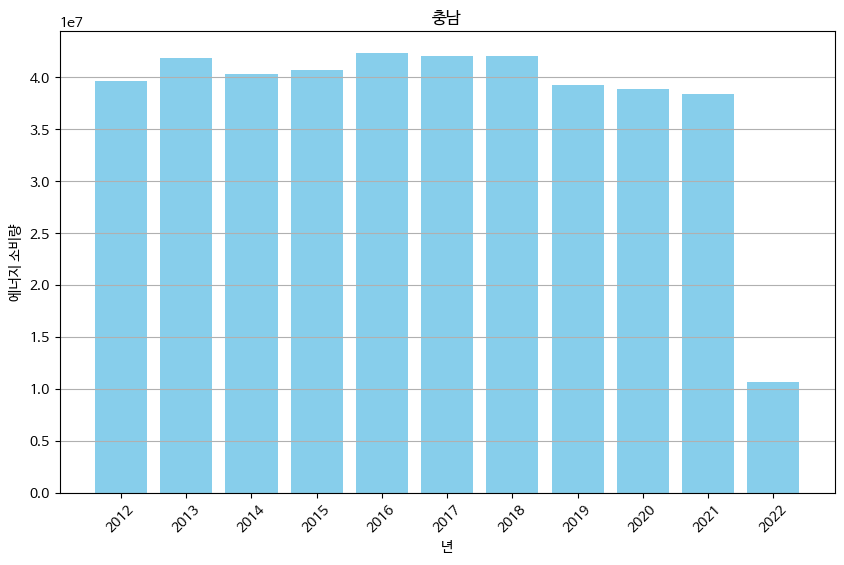

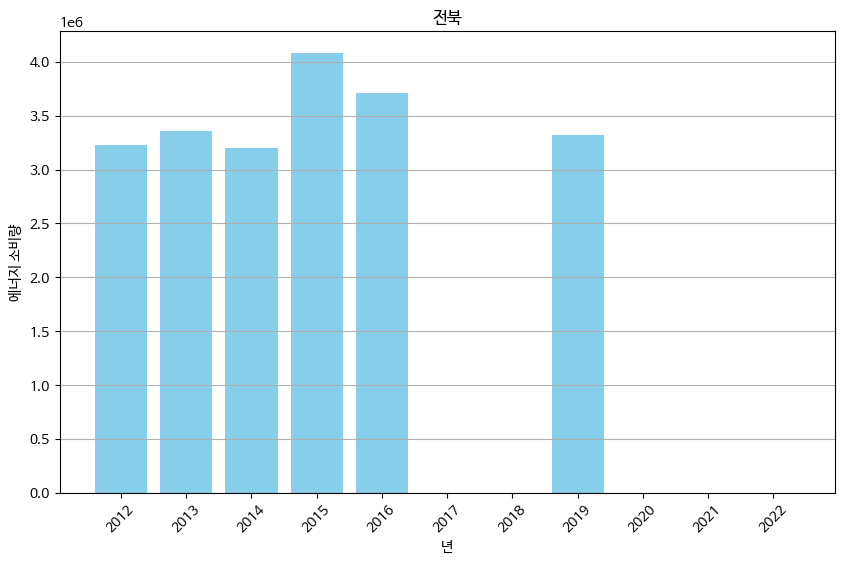

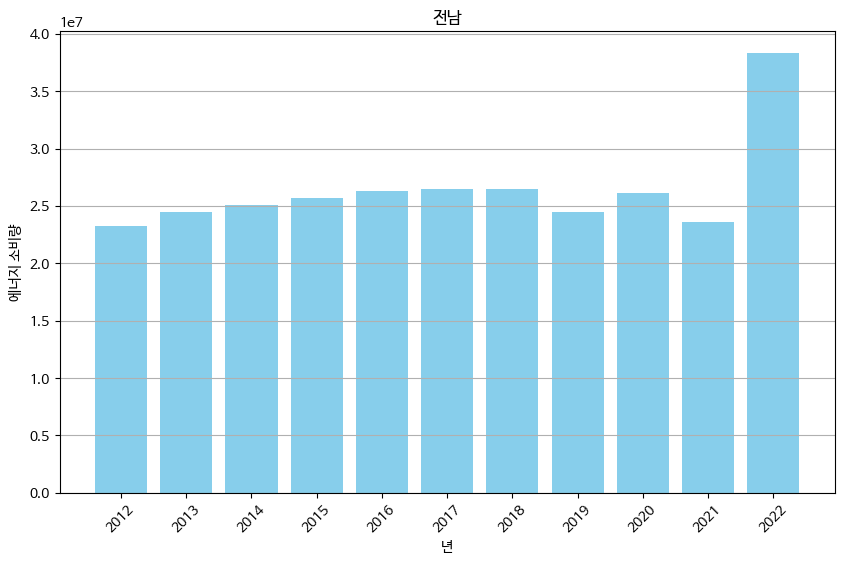

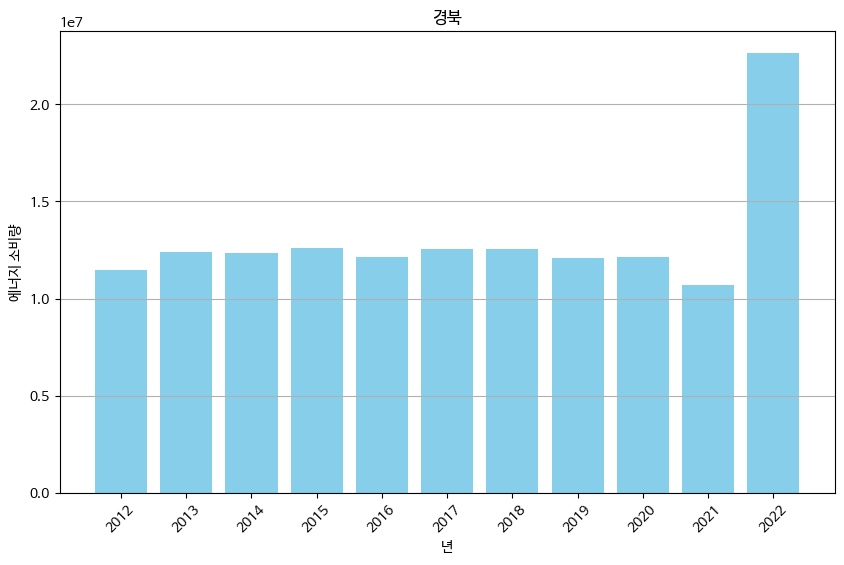

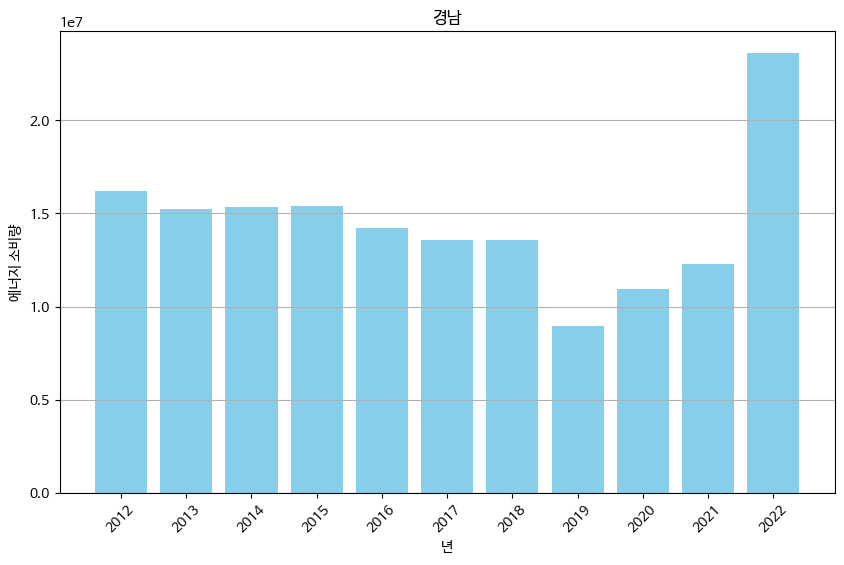

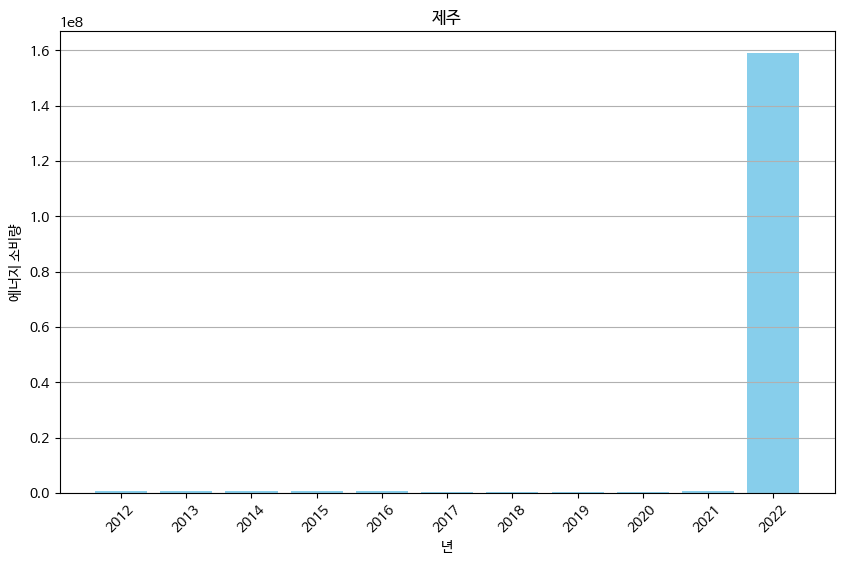

In [9]:
for column in first_row_data.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(first_row_data.index, first_row_data[column], color='skyblue')
    plt.title(column)
    plt.xlabel('년')
    plt.ylabel('에너지 소비량')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#**꺾은선 그래프**

전부

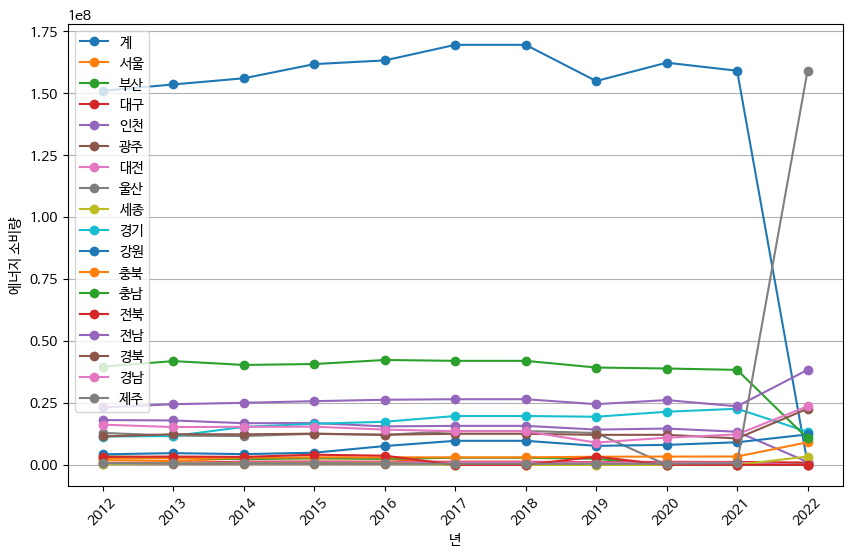

In [11]:
# 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('에너지 소비량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()

total 제외

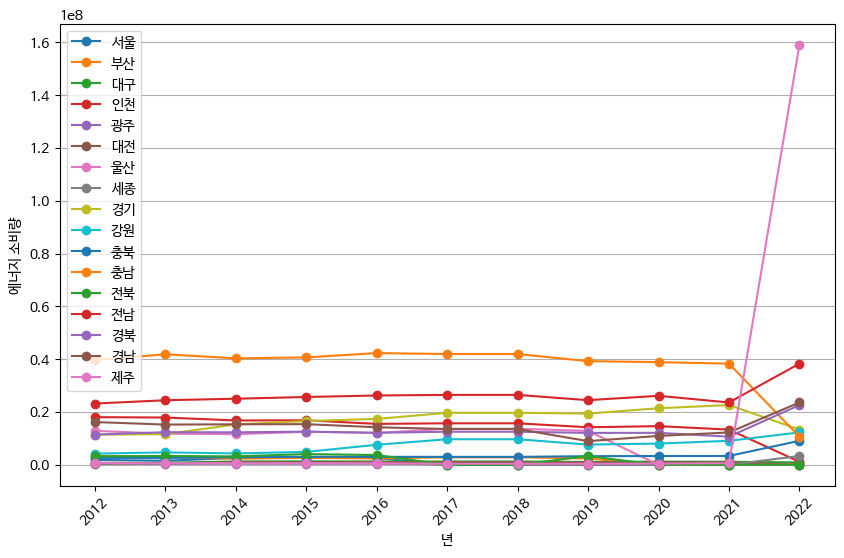

In [10]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=['계'])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('에너지 소비량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()